## SciPy 科学计算基础课程


#### 介绍

SciPy 是一个用于数学、科学和工程的开源库，其集成了统计、优化、线性代数、傅立叶变换、信号和图像处理，ODE 求解器等模块，是使用 Python 进行科学计算的重要工具之一。本课程将带你了解 SciPy 的基础用法。


#### 知识点

- 常量模块
- 线性代数
- 插值函数
- 图像处理
- 优化方法
- 信号处理
- 统计函数
- 稀疏矩阵

<img width='100px' src="https://doc.shiyanlou.com/courses/uid214893-20190605-1559716204211">

[<i class="fa fa-external-link-square" aria-hidden="true"> SciPy</i>](https://www.scipy.org) 从广义上来讲代表使用 Python 进行数学、科学和工程开发的开源软件生态系统，其包含：[<i class="fa fa-external-link-square" aria-hidden="true"> NumPy</i>](https://www.numpy.org)，[<i class="fa fa-external-link-square" aria-hidden="true"> Pandas</i>](https://pandas.pydata.org)，[<i class="fa fa-external-link-square" aria-hidden="true"> Matplotlib</i>](https://matplotlib.org)，[<i class="fa fa-external-link-square" aria-hidden="true"> SymPy</i>](https://sympy.org)，[<i class="fa fa-external-link-square" aria-hidden="true"> IPython</i>](https://ipython.org) 等一系列核心库和工具。以上这些工具也均属于 [<i class="fa fa-external-link-square" aria-hidden="true"> NumFOCUS</i>](https://numfocus.org/sponsored-projects) 赞助项目。


当然，本次课程所涉及到的 SciPy 特指 [<i class="fa fa-external-link-square" aria-hidden="true"> SciPy 核心库</i>](https://github.com/scipy/scipy)，其基于 NumPy 构建，继承了 NumPy 对多维数据的高效计算能力。所以，在学习本课程内容之前，我们建议你先学习 [<i class="fa fa-external-link-square" aria-hidden="true"> NumPy 数值计算基础课程</i>](https://www.lanqiao.cn/courses/912)。


首先，我们导入 SciPy 并查看版本号：

In [1]:
import scipy

scipy.__version__

'1.5.0'

从某种意义上将，SciPy 可以被看作是 NumPy 的拓展和补充。如果你阅读 [<i class="fa fa-external-link-square" aria-hidden="true"> SciPy 官方文档</i>](https://docs.scipy.org/doc/scipy/reference/)，你也会发现其中提到了大量 NumPy 的用法。接下来，我们就尝试了解并掌握 SciPy 库中特有的内容，学习常用的模块和类。

### 常量模块

为了方便科学计算，SciPy 提供了一个叫 [`scipy.constants`](https://docs.scipy.org/doc/scipy/reference/constants.html) 模块，该模块下包含了常用的物理和数学常数及单位。你可以通过前面给出的链接来查看这些常数和单位，这里我们给出几个示例。

例如，数学中的圆周率和黄金分割常数。

In [2]:
from scipy import constants

constants.pi

3.141592653589793

In [3]:
constants.golden

1.618033988749895

物理学经常会用到的真空中的光速、普朗克系数等。

In [4]:
constants.c, constants.speed_of_light  # 两种写法

(299792458.0, 299792458.0)

In [5]:
constants.h, constants.Planck

(6.62607015e-34, 6.62607015e-34)

关于这些常量，你无需每个都记住，实际上其名称都是有逻辑和规律的，基本都是常用英文字母的缩写。真正使用的时候，查阅官方文档即可。

### 线性代数

线性代数应该是科学计算中最常涉及到的计算方法之一，SciPy 中提供的详细而全面的线性代数计算函数。这些函数基本都放置在模块 [`scipy.linalg`](https://docs.scipy.org/doc/scipy/reference/linalg.html) 下方。其中，又大致分为：基本求解方法，特征值问题，矩阵分解，矩阵函数，矩阵方程求解，特殊矩阵构造等几个小类。接下来，我们尝试运用 SciPy 相关的线性代数求解函数。

例如，我们求给定矩阵的逆，就可以用到 `scipy.linalg.inv` 函数。传入函数的一般为 NumPy 给出的数组 `np.array` 或者矩阵 `np.matrix` 类型。

In [6]:
import numpy as np
from scipy import linalg

linalg.inv(np.matrix([[1, 2], [3, 4]]))

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

奇异值分解应该是每个人学习线性代数过程中的痛点，使用 SciPy 提供的 `scipy.linalg.svd` 函数可以十分方便地完成这个过程。例如，我们对一个 $5 \times 4$ 的随机矩阵完成奇异值分解。

In [7]:
U, s, Vh = linalg.svd(np.random.randn(5, 4))
U, s, Vh

(array([[-0.08056985,  0.2018008 ,  0.4673617 , -0.7072217 , -0.48393743],
        [-0.50812923,  0.81680801,  0.03327982,  0.16652138,  0.21399167],
        [-0.42071248, -0.12664039, -0.2419863 ,  0.38275881, -0.77582314],
        [-0.70104869, -0.42559776, -0.23385894, -0.41395813,  0.31834877],
        [ 0.25854384,  0.30810691, -0.81683421, -0.39273712, -0.12947836]]),
 array([2.53069441, 1.53989984, 0.85193535, 0.47148208]),
 array([[-0.46510561,  0.76396847, -0.42272953, -0.14604343],
        [ 0.69324796,  0.49560243, -0.04711061,  0.52112003],
        [-0.15320543, -0.40228328, -0.73799108,  0.51967819],
        [-0.52878363,  0.09433221,  0.52387928,  0.66108986]]))

最终返回酉矩阵 `U` 和 `Vh`，以及奇异值 `s`。

除此之外，[`scipy.linalg`](https://docs.scipy.org/doc/scipy/reference/linalg.html) 还包含像最小二乘法求解函数 `scipy.linalg.lstsq`。现在尝试用其完成一个最小二乘求解过程。除此之外，[`scipy.linalg`](https://docs.scipy.org/doc/scipy/reference/linalg.html) 还包含像最小二乘法求解函数 `scipy.linalg.lstsq`。现在尝试用其完成一个最小二乘求解过程。

首先，我们给出样本的 $x$ 和 $y$ 值。然后假设其符合 $y = ax^2 + b$ 分布。

In [8]:
x = np.array([1, 2.5, 3.5, 4, 5, 7, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

接下来，我们完成 $x^2$ 计算，并添加截距项系数 1。

In [9]:
M = x[:, np.newaxis]**[0, 2]
M

array([[ 1.  ,  1.  ],
       [ 1.  ,  6.25],
       [ 1.  , 12.25],
       [ 1.  , 16.  ],
       [ 1.  , 25.  ],
       [ 1.  , 49.  ],
       [ 1.  , 72.25]])

然后使用 `linalg.lstsq` 执行最小二乘法计算，返回的第一组参数即为拟合系数。

In [10]:
p = linalg.lstsq(M, y)[0]
p

array([0.20925829, 0.12013861])

我们可以通过绘图来查看最小二乘法得到的参数是否合理，绘制出样本和拟合曲线图。

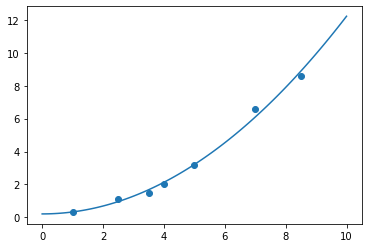

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(x, y)
xx = np.linspace(0, 10, 100)
yy = p[0] + p[1]*xx**2
plt.plot(xx, yy)

[`scipy.linalg`](https://docs.scipy.org/doc/scipy/reference/linalg.html) 模块下方包含许多线性代数运算相关的方法，希望大家通过阅读官方文档了解。

### 插值函数

插值，是数值分析领域中通过已知的、离散的数据点，在范围内推求新数据点的过程或方法。SciPy 提供的 [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html) 模块下方就包含了大量的数学插值方法，涵盖非常全面。

下面，我们介绍使用 SciPy 完成线性插值的过程，这也是插值方法中最简单的一种。首先，我们给出一组 $x$ 和 $y$ 的值。

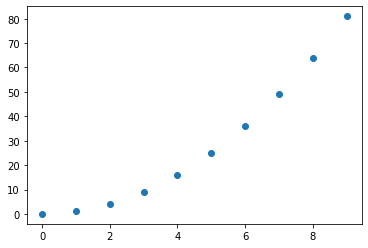

In [12]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([0, 1, 4, 9, 16, 25, 36, 49, 64, 81])

plt.scatter(x, y)

接下来，我们想要在上方两个点与点之间再插入一个值。怎样才能最好地反映数据的分布趋势呢？这时，就可以用到线性插值的方法。

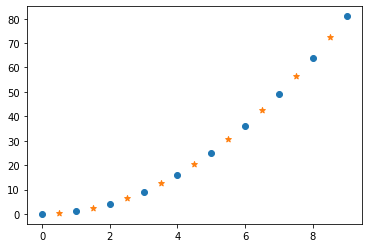

In [13]:
from scipy import interpolate

xx = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5])  # 两点之间的点的 x 坐标
f = interpolate.interp1d(x, y)  # 使用原样本点建立插值函数
yy = f(xx)  # 映射到新样本点

plt.scatter(x, y)
plt.scatter(xx, yy, marker='*')

可以看到，星号点是我们插值的点，而圆点是原样本点，插值的点能准确符合已知离散数据点的趋势。
数学插值方法非常丰富，详细请阅读 SciPy 官方文档列出的各类方法。实际上，如果你学习过 [<i class="fa fa-external-link-square" aria-hidden="true"> Pandas 基础课程内容</i>](https://www.lanqiao.cn/courses/906)，那么应该知道 Pandas 在填充缺失值时就可以用到数学插值方法，而 Pandas 调用的插值方法即来自于 SciPy。

### 图像处理

有趣的是，SciPy 集成了大量针对图像处理的函数和方法。当然，一张彩色图片是由 RGB 通道组成，而这实际上就是一个多维数组。所以，SciPy 针对图像的处理的模块 [`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/ndimage.html)，实际上也是针对多维数组的处理过程，你可以完成卷积、滤波，转换等一系列操作。

![image](https://doc.shiyanlou.com/document-uid214893labid6102timestamp1532323291827.png)
<div style="color: #888; font-size: 10px; text-align: right;"><a href="https://dzone.com/articles/a-beginners-guide-to-understanding-convolutional-n?spm=5176.100239.blogcont231697.12.hWUElB"><i class="fa fa-copyright" aria-hidden="true"> 来源</i></a></div>

在正式了解 [`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/ndimage.html) 模块之前，我们先使用 [`scipy.misc`](https://docs.scipy.org/doc/scipy/reference/misc.html) 模块中的 `face` 方法导入一张浣熊的示例图片。[`scipy.misc`](https://docs.scipy.org/doc/scipy/reference/misc.html) 是一个杂项模块，包含了一些无法被准确归类的方法。

In [14]:
from scipy import misc

face = misc.face()
face

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

`face` 默认是图片的 RGB 数组，我们可以对其进行可视化还原。

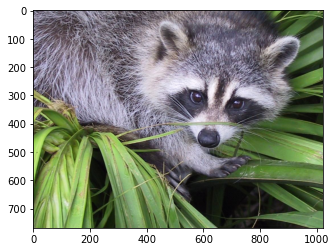

In [15]:
plt.imshow(face)

接下来，我们尝试 [`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/ndimage.html) 中的一些图像处理方法。例如，对图片进行高斯模糊处理。

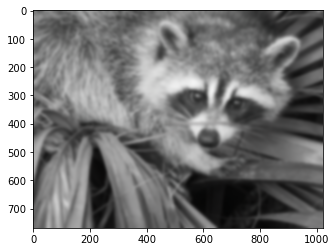

In [16]:
from scipy import ndimage

plt.imshow(ndimage.gaussian_filter(face, sigma=5))

针对图像进行旋转变换。

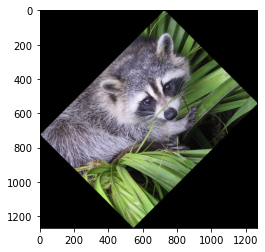

In [17]:
plt.imshow(ndimage.rotate(face, 45))

或者对图像执行卷积操作，首先随机定义一个卷积核 `k`，然后再执行卷积。

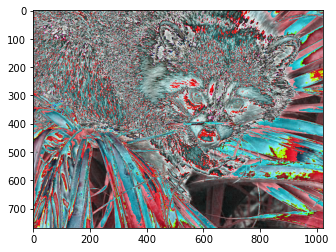

In [18]:
k = np.random.randn(2, 2, 3)
plt.imshow(ndimage.convolve(face, k))

更多关于多维图像数组的操作，请大家对照官方文档练习。

### 优化方法
最优化，是应用数学的一个分支，一般我们需要最小化（或者最大化）一个目标函数，而找到的可行解也被称为最优解。最优化的思想在工程应用领域非常常见。举例来讲，机器学习算法都会有一个目标函数，我们也称之为损失函数。而找到损失函数最小值的过程也就是最优化的过程。我们可能会用到最小二乘法，梯度下降法，牛顿法等最优化方法来完成。

SciPy 提供的 `scipy.optimize` 模块下包含大量写好的最优化方法。例如上面我们用过的 `scipy.linalg.lstsq` 最小二乘法函数在 `scipy.optimize` 模块下也有一个很相似的函数 `scipy.optimize.least_squares`。这个函数可以解决非线性的最小二乘法问题。
`scipy.optimize` 模块下最常用的函数莫过于 `scipy.optimize.minimize`，因为只需要指定参数即可以选择大量的最优化方法。例如 `scipy.optimize.minimize(method="BFGS")` 准牛顿方法。

接下来，我们沿用上面 `scipy.linalg.lstsq` 演示时同样的数据，使用 `scipy.linalg.lstsq` 最小二乘法来搞定最小二乘法计算过程。这里会比上面麻烦一些，首先定义拟合函数 `func` 和残差函数 `err_func`，实际上我们需要求解残差函数的最小值。

In [19]:
def func(p, x):
    w0, w1 = p
    f = w0 + w1*x*x
    return f


def err_func(p, x, y):
    ret = func(p, x) - y
    return ret

In [20]:
from scipy.optimize import leastsq

p_init = np.random.randn(2)  # 生成 2 个随机数
x = np.array([1, 2.5, 3.5, 4, 5, 7, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])
# 使用 Scipy 提供的最小二乘法函数得到最佳拟合参数
parameters = leastsq(err_func, p_init, args=(x, y))
parameters[0]

array([0.20925836, 0.12013861])

不出意外的话，这里得到的结果和上面 `scipy.linalg.lstsq` 得到的结果一模一样。

### 信号处理

[<i class="fa fa-external-link-square" aria-hidden="true"> 信号处理</i>](https://zh.wikipedia.org/wiki/%E4%BF%A1%E5%8F%B7%E5%A4%84%E7%90%86)（英语：Signal processing）是指对信号表示、变换、运算等进行处理的过程，其在计算机科学、药物分析、电子学等学科中应用广泛。几十年来，信号处理在诸如语音与数据通信、生物医学工程、声学、声呐、雷达、地震、石油勘探、仪器仪表、机器人、日用电子产品以及其它很多的这样一些广泛的领域内起着关键的作用。

SciPy 中关于信号处理的相关方法在 [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal) 模块中，其又被划分为：卷积，B-样条，滤波，窗口函数，峰值发现，光谱分析等 13 个小类，共计百余种不同的函数和方法。所以说，信号处理是 SciPy 中十分重要的模块之一。
                                     
首先，我们尝试生成一些规则的波形图，例如锯齿波、方形波等。                                     

Text(0.5, 1.0, 'gausspulse')

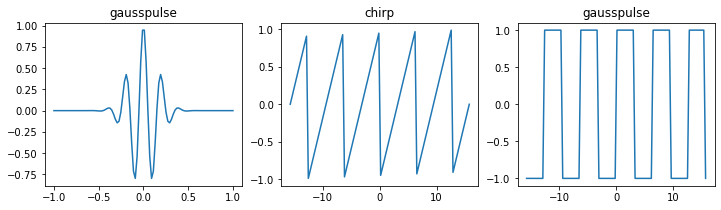

In [21]:
from scipy import signal

t = np.linspace(-1, 1, 100)

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].plot(t, signal.gausspulse(t, fc=5, bw=0.5))
axes[0].set_title("gausspulse")
t *= 5*np.pi
axes[1].plot(t, signal.sawtooth(t))
axes[1].set_title("chirp")
axes[2].plot(t, signal.square(t))
axes[2].set_title("gausspulse")

下面我们来尝试应用几个滤波函数，首先生成一组包含噪声的波形图。

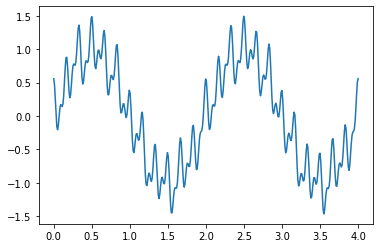

In [22]:
def f(t): return np.sin(np.pi*t) + 0.1*np.cos(7*np.pi*t+0.3) + \
    0.2 * np.cos(24*np.pi*t) + 0.3*np.cos(12*np.pi*t+0.5)


t = np.linspace(0, 4, 400)
plt.plot(t, f(t))

然后，我们使用 SciPy 中的中值滤波函数 `scipy.signal.medfilt` 和维纳滤波函数 `scipy.signal.wiener`。

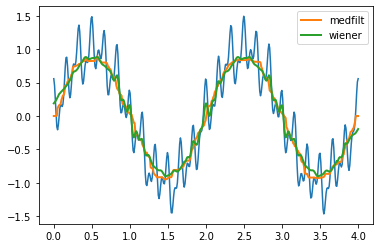

In [23]:
plt.plot(t, f(t))
plt.plot(t, signal.medfilt(f(t), kernel_size=55), linewidth=2, label="medfilt")
plt.plot(t, signal.wiener(f(t), mysize=55), linewidth=2, label="wiener")
plt.legend()

可以从上图看出很明显的滤波后效果。
关于 [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal) 模块中更多的函数用法，需要大量关于信号处理专业知识的积累，我们这里不再进行讲解。你可以根据自己的需求来阅读官方文档学习。

                    

### 统计函数
统计理论应用广泛，尤其是和计算机科学等领域形成的交叉学科，为数据分析、机器学习等提供了强大的理论支撑。SciPy 自然少不了针对统计分析的相关函数，集中在 [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) 模块中。
                                                                                              
[`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) 模块包含大量概率分布函数，主要有连续分布、离散分布以及多变量分布。除此之外还有摘要统计、频率统计、转换和测试等多个小分类。基本涵盖了统计应用的方方面面。
下面，我们以比较有代表性的 [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) 正态分布连续随机变量函数为代表进行介绍。我们尝试使用 `.rvs` 方法随机抽取 1000 个正态分布样本，并绘制出条形图。                

(array([  3.,  11.,  57., 121., 225., 251., 185.,  93.,  42.,  12.]),
 array([-3.48445449, -2.82989596, -2.17533743, -1.52077891, -0.86622038,
        -0.21166186,  0.44289667,  1.09745519,  1.75201372,  2.40657224,
         3.06113077]),
 <BarContainer object of 10 artists>)

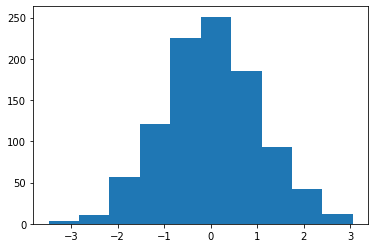

In [24]:
from scipy.stats import norm

plt.hist(norm.rvs(size=1000))

除了 `norm.rvs` 返回随机变量，`norm.pdf` 返回概率密度函数，`norm.cdf` 返回累计分布函数，`norm.sf` 返回残存函数，`norm.ppf` 返回分位点函数，`norm.isf` 返回逆残存函数，`norm.stats` 返回均值，方差，（费舍尔）偏态，（费舍尔）峰度，以及 `norm.moment` 返回分布的非中心矩。对于这些提到的方法，对于大多数 SciPy 连续变量分布函数（柯西分布，泊松分布等）都是通用的。
例如，可以基于概率密度函数绘制出正态分布曲线。

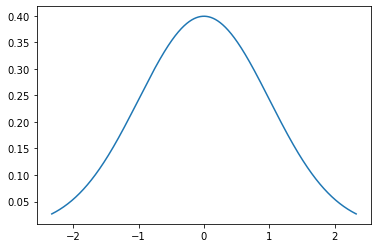

In [25]:
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 1000)
plt.plot(x, norm.pdf(x))

除此之外，[`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) 模块还有很多实用的方法，例如返回数据的摘要。

In [26]:
from scipy.stats import describe

describe(x)

DescribeResult(nobs=1000, minmax=(-2.3263478740408408, 2.3263478740408408), mean=0.0, variance=1.8093857372505617, skewness=9.356107558947013e-17, kurtosis=-1.2000024000024)

`describe` 可以返回给定数组最大值、最小值、平均值、方差等信息。[`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) 模块所涉及专业性较强，应用门槛比较高，需要你对统计学理论比较熟悉，才能知晓其中函数的释义。

### 稀疏矩阵

数值分析中，元素大部分为零的矩阵被称为 [<i class="fa fa-external-link-square" aria-hidden="true"> 稀疏矩阵</i>](https://zh.wikipedia.org/wiki/%E7%A8%80%E7%96%8F%E7%9F%A9%E9%98%B5)。反之，如果大部分元素都非零，则这个矩阵是稠密的。在科学与工程领域中求解线性模型时经常出现大型的稀疏矩阵。但是计算机在执行稀疏矩阵运算时，通常会遇到很多麻烦。由于其自身的稀疏特性，通过压缩可以大大节省稀疏矩阵的内存代价。更为重要的是，由于过大的尺寸，标准的算法经常无法操作这些稀疏矩阵。
所以说，SciPy 中的 [`scipy.sparse`](https://docs.scipy.org/doc/scipy/reference/sparse.html) 模块提供了关于稀疏矩阵的储存方法，而 [`scipy.sparse.linalg`](https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html) 中由包含了专门针对稀疏线性代数的处理方法。此外，[`scipy.sparse.csgraph`](https://docs.scipy.org/doc/scipy/reference/scipy.sparse.csgraph.html) 还包含了一些稀疏矩阵的拓扑图理论。
`scipy.sparse` 中大致有七类稀疏矩阵储存方法，分别为：`csc_matrix` 压缩稀疏列矩阵，`csr_matrix` 压缩稀疏行矩阵，`bsr_matrix` 块稀疏行矩阵，`lil_matrix` 基于行的链表稀疏矩阵，`dok_matrix` 基于字典稀疏矩阵，`coo_matrix` 坐标格式的稀疏矩阵，`dia_matrix` 对角线稀疏矩阵。
下面，使用一个简单的 NumPy 数组作为示例，将其转换为稀疏矩阵储存。首先是 `csr_matrix` 压缩稀疏行矩阵。

In [27]:
from scipy.sparse import csr_matrix

array = np.array([[2, 0, 0, 3, 0, 0], [1, 0, 1, 0, 0, 2], [0, 0, 1, 2, 0, 0]])
csr = csr_matrix(array)
print(csr)

  (0, 0)	2
  (0, 3)	3
  (1, 0)	1
  (1, 2)	1
  (1, 5)	2
  (2, 2)	1
  (2, 3)	2


可以看到，稀疏矩阵保存时，实际上是通过坐标的形式表示出矩阵中非零元素的位置。下面尝试使用 `csc_matrix` 压缩稀疏列矩阵储存同一个数组。

In [28]:
from scipy.sparse import csc_matrix

csc = csc_matrix(array)
print(csc)

  (0, 0)	2
  (1, 0)	1
  (1, 2)	1
  (2, 2)	1
  (0, 3)	3
  (2, 3)	2
  (1, 5)	2


实际上，对比就可以看出二者储存的顺序不一样，一个是按行顺序一个是按列顺序。稀疏矩阵表示，可以通过 `todense()` 变为稠密矩阵表示。

In [29]:
csc.todense()

matrix([[2, 0, 0, 3, 0, 0],
        [1, 0, 1, 0, 0, 2],
        [0, 0, 1, 2, 0, 0]], dtype=int32)

接下来，我们通过对比稀疏矩阵和稠密矩阵储存时所耗费的内存大小。首先，我们生成一个 $1000 \times 1000$ 的随机矩阵，然后将其中小于 1 的值替换为 0 人为变成稀疏矩阵。

In [30]:
from scipy.stats import uniform

data = uniform.rvs(size=1000000, loc=0, scale=2).reshape(1000, 1000)
data[data < 1] = 0
data

array([[1.40312211, 1.84490067, 1.33606248, ..., 1.56708782, 1.02513544,
        1.5697549 ],
       [1.44571447, 0.        , 0.        , ..., 1.1748232 , 1.11731304,
        1.78222157],
       [1.19190984, 1.07701611, 0.        , ..., 1.20454885, 0.        ,
        0.        ],
       ...,
       [1.18732443, 0.        , 1.23285639, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.86122495, 0.        , ..., 0.        , 1.77202379,
        1.21722889],
       [1.39329578, 1.84774193, 1.54991505, ..., 0.        , 1.79275671,
        1.39006606]])

接下来，我们打印该稠密矩阵在内存中所耗费的存储大小，单位为 MB。

In [31]:
data.nbytes/(1024**2)

7.62939453125

接下来，我们以稀疏矩阵存储，并以同样的单位查看大小。

In [32]:
data_csr = csr_matrix(data)
data_csr.data.size/(1024**2)

0.47724437713623047

不出意外的话，以稀疏矩阵格式存储所耗费的内存空间应该远小于以稠密矩阵存储的方式。

本次课程，我们介绍了使用 SciPy 进行科学计算的一系列方法。其中包括：常量模块，线性代数，插值函数，图像处理，优化方法，信号处理，统计函数，稀疏矩阵等。不过，对于 SciPy 中涉及到的这一系列模块，我们只是完成了基础的应用和练习。